<a href="https://colab.research.google.com/github/MagicYYe/NYU_Integrated_Marketing/blob/main/zy2170_Predicting_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install pingouin

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/NYU_Integrated_Marketing/main/Regressions/customer_churn_train.csv')
df=df.dropna()
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

# Correlation


In [ ]:
# install the software
import pingouin as pg

### The pairwise correlation 
https://pingouin-stats.org/generated/pingouin.pairwise_corr.html#pingouin.pairwise_corr

In [ ]:
pg.pairwise_corr(df,columns=['total_day_calls', 'number_customer_service_calls'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,total_day_calls,number_customer_service_calls,pearson,two-sided,4250,-0.016,"[-0.05, 0.01]",0.0,-0.0,-0.016,0.302,0.033,0.178


In [ ]:
pg.pairwise_corr(df,columns=['total_day_calls', 'number_customer_service_calls','account_length'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,total_day_calls,number_customer_service_calls,pearson,two-sided,4250,-0.016,"[-0.05, 0.01]",0.000,-0.0,-0.016,0.302,0.033,0.178
1,total_day_calls,account_length,pearson,two-sided,4250,0.023,"[-0.01, 0.05]",0.001,0.0,0.023,0.134,0.059,0.323
2,number_customer_service_calls,account_length,pearson,two-sided,4250,0.001,"[-0.03, 0.03]",0.000,-0.0,0.001,0.948,0.019,0.050


### The Partial correlation
https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr

In [ ]:
# Partial correlation of total_day_calls and number_customer_service_calls controlling for account_length
x='total_day_calls'
y='number_customer_service_calls'
control='account_length'
pg.partial_corr(data=df, x=x, y=y, covar=control,
                method='pearson').round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,4250,-0.016,"[-0.05, 0.01]",0.0,-0.0,0.301,0.033,0.179


# Regression

## Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [ ]:
#install the package
import seaborn as sns

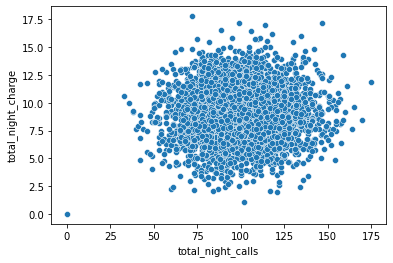

In [ ]:
x='total_night_calls'
y='total_night_charge'
sns.scatterplot(data=df, x=x, y=y)

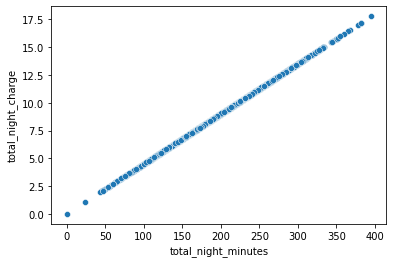

In [ ]:
x='total_night_minutes'
y='total_night_charge'
sns.scatterplot(data=df, x=x, y=y)

### Regression Result
https://www.statsmodels.org/stable/regression.html

In [ ]:
import statsmodels.api as sm

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
# define the dependent and independent variables
X=df[['total_night_calls','total_night_minutes']]
y=df['total_night_charge']


In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,total_night_calls,total_night_minutes
0,1.0,103,254.4
1,1.0,104,162.6
2,1.0,89,196.9
3,1.0,121,186.9
4,1.0,118,212.6


In [ ]:
# conduct regression
model = sm.OLS(y, X).fit()

In [ ]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_night_charge   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.330e+09
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        03:02:51   Log-Likelihood:                 18857.
No. Observations:                4250   AIC:                        -3.771e+04
Df Residuals:                    4247   BIC:                        -3.769e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0003    

### Check assumptions

In [ ]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,0.001857,11.448143
1,0.002879,7.317121
2,-0.000657,8.860657
3,-0.000594,8.410594
4,0.002894,9.567106


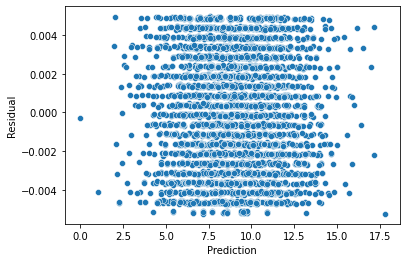

In [ ]:
#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

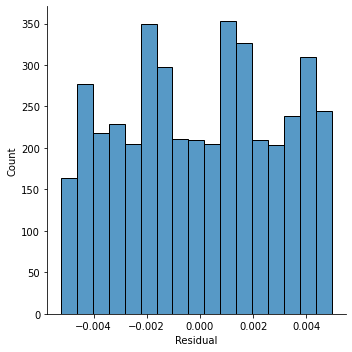

In [ ]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [ ]:
x=df_res['Residual']
pg.normality(x)

,W,pval,normal
Residual,0.956341,6.632185e-34,False


In [ ]:
pg.pairwise_corr(df,columns=['total_day_charge','total_eve_charge'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,total_day_charge,total_eve_charge,pearson,two-sided,4250,-0.013,"[-0.04, 0.02]",0.0,-0.0,-0.013,0.388,0.028,0.139


#Logit Analysis

In [ ]:
df['Churn_Numeric'] = df['churn'].apply(lambda x: 1 if x =='yes' else 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,Churn_Numeric
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no,0
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no,0


In [ ]:
y=df['Churn_Numeric']
X=df[['total_intl_charge','number_customer_service_calls','account_length']]

In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,total_intl_charge,number_customer_service_calls,account_length
0,1.0,3.70,1,107
1,1.0,3.29,0,137
2,1.0,1.78,2,84
3,1.0,2.73,3,75
4,1.0,2.03,3,121


In [ ]:
# conduct regression
logit_model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.382323
         Iterations 6


In [ ]:
# print model summary
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:          Churn_Numeric   No. Observations:                 4250
Model:                          Logit   Df Residuals:                     4246
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                 0.05888
Time:                        03:02:52   Log-Likelihood:                -1624.9
converged:                       True   LL-Null:                       -1726.5
Covariance Type:            nonrobust   LLR p-value:                 8.080e-44
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -3.4036      0.229    -14.877      0.000      -3.852      -2.955
total_intl_charge                 0.2421      0.062      3.878      0.000 

In [ ]:
### get the odds ratio
np.exp(logit_model.params)

const                            0.033255
total_intl_charge                1.273896
number_customer_service_calls    1.533190
account_length                   1.001342
dtype: float64

In [ ]:
### get the predictions 
pred_prob = logit_model.predict(X)
df_result=pd.DataFrame({'Pred_prob': pred_prob,'y':y})
df_result['Prediction']=df_result['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_result.head()

,Pred_prob,y,Prediction
0,0.125978,0,0
1,0.081408,0,0
2,0.118648,0,0
3,0.204234,0,0
4,0.187278,0,0


In [ ]:
from sklearn.metrics import accuracy_score
Prediction = df_result['Prediction']
accuracy_score(y, Prediction)

0.859764705882353

# Cross Validation

In [ ]:
## get the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# conduct regression
logit_model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.391928
         Iterations 6


In [ ]:
# print model summary
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:          Churn_Numeric   No. Observations:                 3400
Model:                          Logit   Df Residuals:                     3396
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                 0.05673
Time:                        03:02:52   Log-Likelihood:                -1332.6
converged:                       True   LL-Null:                       -1412.7
Covariance Type:            nonrobust   LLR p-value:                 1.588e-34
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -3.3869      0.253    -13.375      0.000      -3.883      -2.891
total_intl_charge                 0.2562      0.069      3.718      0.000 

In [ ]:
### get the predictions on the test data
pred_prob = logit_model.predict(X_test)
df_test=pd.DataFrame({'Pred_prob': pred_prob,'y_test':y_test})
df_test['Prediction']=df_test['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_test.head()

,Pred_prob,y_test,Prediction
409,0.123587,0,0
367,0.084873,0,0
418,0.172710,0,0
2573,0.069348,0,0
2822,0.126665,0,0


In [ ]:
from sklearn.metrics import accuracy_score
Prediction =df_test['Prediction']
accuracy_score(y_test, Prediction)

0.88

### draw confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix
confmtrx = np.array(confusion_matrix(y_test, Prediction))
pd.DataFrame(confmtrx, index=['Non-Churn','Churn'],
columns=['predicted_Non_Churn', 'predicted_Churn'])

,predicted_Non_Churn,predicted_Churn
Non-Churn,745,3
Churn,99,3


#Calculate the F1 score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, Prediction)

0.05555555555555555

# Cross validation for multiple times

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
scores = cross_val_score(log_reg, X, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.86352941 0.85411765 0.85882353 0.86117647 0.85882353 0.85882353
 0.86588235 0.85882353 0.85882353 0.85882353]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8541176470588235, 0.859764705882353, 0.8658823529411764)

# Appendix

In [ ]:
Z =np.linspace(-100,100,10000)
P=np.exp(Z)/(1+np.exp(Z))
import plotly.express as px
fig = px.scatter(x=Z, y=P)
fig.show()